In [201]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Parameters
plt.rcParams["figure.figsize"] = (12,9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
import numpy as np

## Declare a new variable

In [203]:
A = np.array([[7, 3], [3, -1]])

In [204]:
np.linalg.eig(A)


(array([ 8., -2.]), array([[ 0.9486833 , -0.31622777],
        [ 0.31622777,  0.9486833 ]]))

In [205]:
A[0,0] * A[1, 1] - A[0, 1] * A[1, 0]


-16

In [206]:
np.eye(2, 2)

array([[1., 0.],
       [0., 1.]])

In [207]:
D = A[0,0] * A[1, 1] - A[0, 1] * A[1, 0]


In [33]:
T = A[0,0] + A[1, 1]

In [42]:
L1 = T / 2. + ((T ** 2) / 4 - D) ** 0.5

In [43]:
L2 = T / 2. - ((T ** 2) / 4 - D) ** 0.5

In [208]:
L1, L2

(8.0, -2.0)

In [209]:
25 ** 0.5

5.0

In [37]:
T


6

In [45]:
[L1 - -1]

[9.0]

In [46]:
A + L1

array([[15., 11.],
       [11.,  7.]])

In [210]:
np.dot(A, np.array([3, 1]))

array([24,  8])

In [57]:
8 * np.array([3, 1])

array([24,  8])

In [89]:
V1 = np.array([L1 - A[1,1], A[1,0] / 1. ])

In [90]:
np.dot(A, V1)

array([72., 24.])

In [91]:
L1 * V1

array([72., 24.])

In [92]:
V2 = np.array([L2 - A[1,1], A[1,0] / 1. ])

In [93]:
np.dot(A, V2)

array([ 2., -6.])

In [94]:
L2 * V2

array([ 2., -6.])

In [95]:
?np.linalg.eig

In [96]:
(L2 * V2) / (40 ** 0.5)

array([ 0.31622777, -0.9486833 ])

In [97]:
import matplotlib.pyplot as plt

In [102]:
ax.quiver?

In [121]:
VN1 = V1 / ((V1**2).sum())**.5

In [122]:
VN2 = V2 / ((V2**2).sum())**.5

In [127]:
E1 = L1 * VN1

In [126]:
E2 = L2 * VN2

In [129]:
E = np.vstack([E1, E2])

In [131]:
E[:,0]

array([7.58946638, 0.63245553])

In [115]:
V1, V2

(array([9., 3.]), array([-1.,  3.]))

In [135]:
from matplotlib.patches import Ellipse

In [148]:
np.tan([V1[0], V1[1]])

array([-0.45231566, -0.14254654])

In [149]:
#https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [198]:
ang = angle_between(V1, [1,0]) / math.pi * 180 
C = np.vstack([A, E])
Z = np.zeros(C.shape)
M = np.ones((C.shape[0], ))
M[int(M.shape[0] / 2):,] = 0.0


In [199]:
M

array([1., 1., 0., 0.])

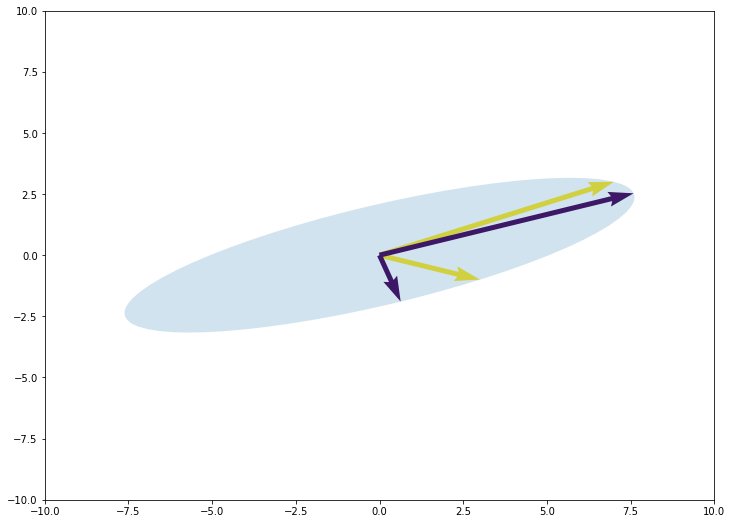

In [200]:
np.x1=np.array([1189.01,1185.0,1012.163,1873.221,194.2559])
np.y1=np.array([14.45688,979.85659999999996,639.15629999999,249.173599999,67.10436])
np.x2=np.array([1188.8416489474798,1184.843265982,1012.074063414,1873.077105230,194.30567379144])
np.y2=np.array([14.855950959,980.058587129,639.232680302,249.412057655,67.3004825209])
plt.figure()
ax = plt.gca()


e = Ellipse((0, 0), 2 * (E[0]**2).sum() ** .5, 2 * (E[1]**2).sum() ** .5, ang)
#ax.ellipse([0, 0], (E[0]**2).sum() ** .5, (E[1]**2).sum() ** .5)
e.set_alpha(0.2)
ax.add_artist(e)
ax.quiver(Z[:, 0], Z[:, 1], C[:, 0], C[:,1], M, angles='xy', scale_units='xy', scale=1)
#ax.quiver([0, 0], [0, 0], E[:,0], E[:,1], [1.,0.], angles='xy', scale_units='xy', scale=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.show()

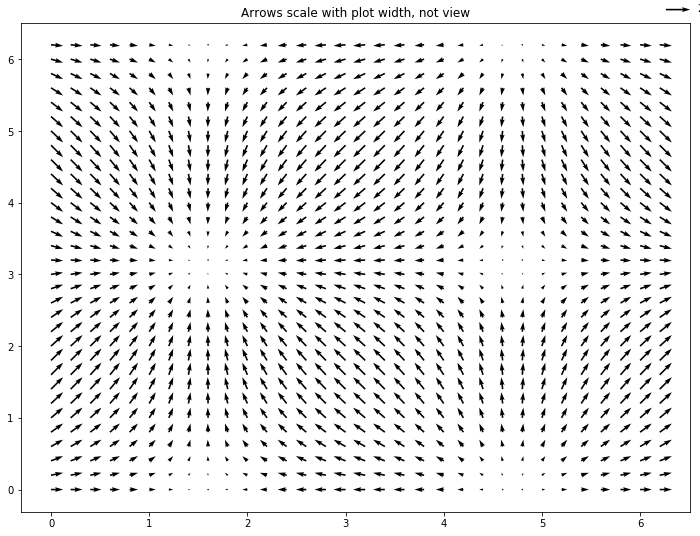

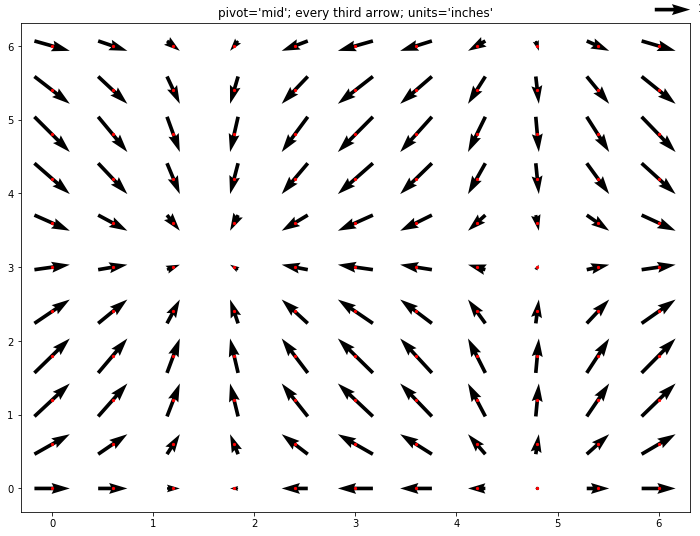

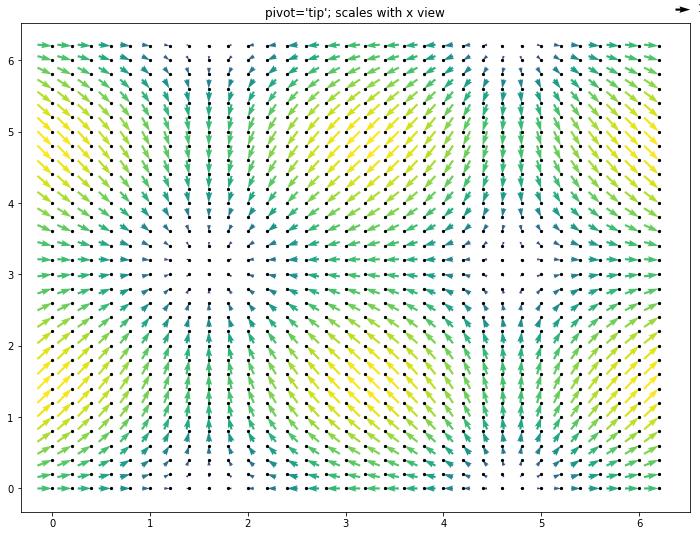

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.figure()
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.figure()
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)

plt.show()

In [106]:
M

array([[1.        , 0.98006658, 0.92106099, ..., 0.88551952, 0.96017029,
        0.9965421 ],
       [1.01954377, 1.        , 0.94224352, ..., 0.90753199, 0.98050828,
        1.01615238],
       [1.07314801, 1.0545981 , 1.        , ..., 0.96736315, 1.03613398,
        1.06992654],
       ...,
       [1.10265824, 1.08461315, 1.03160484, ..., 1.        , 1.06666872,
        1.09952323],
       [1.03830295, 1.01911899, 0.96251045, ..., 0.92855686, 1.        ,
        1.03497303],
       [1.00344599, 0.9835824 , 0.92480117, ..., 0.88940917, 0.9637587 ,
        1.        ]])